In [1]:
import os 
import json
import pickle
import datetime

import pandas as pd
from pprint import pprint
from bisect import bisect_left as find_prev
import matplotlib.pyplot as plt

import xml.etree.ElementTree as xml

strptime = datetime.datetime.strptime

In [2]:
episodes_numbers = list(map(str, range(60, 70+1))) + list(map(str, range(79, 89+1)))
videos_data      = xml.parse('eastenders.collection.xml').getroot().findall("./VideoFile")

episodes_filenames = {v.find('id').text : v.find('filename').text
                      for v in videos_data
                      if v.find('id').text in episodes_numbers}
episodes_filenames

{'60': '5245830105934359183.mp4',
 '61': '5248439298566680341.mp4',
 '62': '5251033029316736209.mp4',
 '63': '5253646087419594905.mp4',
 '64': '5256228221757951173.mp4',
 '65': '5258818087037440299.mp4',
 '66': '5264050645694159353.mp4',
 '67': '5266645664934403562.mp4',
 '68': '5269245838135402929.mp4',
 '69': '5271844722846213628.mp4',
 '70': '5274434588125702436.mp4',
 '79': '5300410550331962313.mp4',
 '80': '5300433743159556513.mp4',
 '81': '5303026185415228226.mp4',
 '82': '5305617339184877785.mp4',
 '83': '5308226531817199474.mp4',
 '84': '5310822839547632763.mp4',
 '85': '5313398531435045858.mp4',
 '86': '5316007724067368375.mp4',
 '87': '5318609185758554501.mp4',
 '88': '5321170704253895214.mp4',
 '89': '5323778608396028180.mp4'}

In [3]:
shots_starts = {}
shots_ends = {}
shots_ids = {}

for line in open('eastenders.masterShotReferenceTable.txt', 'r'):
    line = line.strip()
    if not line: continue
    episode_number = line.split()[0].strip()
    if episode_number in episodes_numbers:
        file = episodes_filenames[episode_number]
        if file not in shots_starts: 
            shots_starts[file] = []
            shots_ends[file] = []
            shots_ids[file] = []
        _, shot_id, start, end = line.split()
        
        shot_number = int(shot_id.split('_')[1])
        if (int(episode_number) < 71 and shot_number > 2040) or (int(episode_number) > 78 and shot_number > 2036):
            continue
        ref = datetime.datetime(1900, 1, 1)
        start = (strptime(start[1:12], '%H:%M:%S:%f') - ref).total_seconds()
        end   = (strptime(end[1:12], '%H:%M:%S:%f') - ref).total_seconds()

        shots_starts[file].append(start)
        shots_ends[file].append(end)
        shots_ids[file].append(int(shot_id.split('_')[1]))

In [4]:
shots_ids.keys()

dict_keys(['5245830105934359183.mp4', '5248439298566680341.mp4', '5251033029316736209.mp4', '5253646087419594905.mp4', '5256228221757951173.mp4', '5258818087037440299.mp4', '5264050645694159353.mp4', '5266645664934403562.mp4', '5269245838135402929.mp4', '5271844722846213628.mp4', '5274434588125702436.mp4', '5300410550331962313.mp4', '5300433743159556513.mp4', '5303026185415228226.mp4', '5305617339184877785.mp4', '5308226531817199474.mp4', '5310822839547632763.mp4', '5313398531435045858.mp4', '5316007724067368375.mp4', '5318609185758554501.mp4', '5321170704253895214.mp4', '5323778608396028180.mp4'])

In [5]:
shots_starts['5245830105934359183.mp4'][:3], shots_ends['5245830105934359183.mp4'][:3], shots_ids['5245830105934359183.mp4'][:3]

([0.0, 20.22, 23.21], [20.21, 23.2, 25.14], [1, 2, 3])

In [6]:
shots_ids['5245830105934359183.mp4'][-10:]

[2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040]

In [109]:
j = json.load(open('../facerec/1.all_people/5256228221757951173.json', 'r'))

In [110]:
j.keys()

dict_keys(['locator', 'media', 'status', 'project', 'tracks', 'feat_clusters'])

In [111]:
j['locator']

'/data/eastenders/5256228221757951173.mp4'

In [112]:
j['tracks']

[{'name': 'Minty Peterson',
  'project': 'trecvid_vsum',
  'track_id': 49958,
  'confidence': 0.43011114848968085,
  'locator': '/data/eastenders/5256228221757951173.mp4',
  'bounding': {'x': 230,
   'y': 103,
   'w': 74,
   'h': 104,
   'xywh': '230,103,74,104'},
  'rect': [230.0, 103.33333333333333, 304.44444444444446, 207.77777777777777],
  'frame_size': [518, 691],
  'end_sample': 2288,
  'start_sample': 2286,
  'end_frame': 57200,
  'start_frame': 57150,
  'end_npt': 2288.0,
  'start_npt': 2286.0,
  'merged_tracks': [49958]},
 {'name': 'Tony King',
  'project': 'trecvid_vsum',
  'track_id': 49237,
  'confidence': 0.6721930421333914,
  'locator': '/data/eastenders/5256228221757951173.mp4',
  'bounding': {'x': 483,
   'y': 118,
   'w': 117,
   'h': 133,
   'xywh': '483,118,117,133'},
  'rect': [483.3333333333333,
   118.88888888888889,
   601.1111111111111,
   252.22222222222223],
  'frame_size': [518, 691],
  'end_sample': 753,
  'start_sample': 748,
  'end_frame': 18825,
  'start_

In [11]:
len(j)

6

In [23]:
data = []
for filename in os.listdir('../facerec/1.all_people/'):
    j = json.load(open('../facerec/1.all_people/'+filename, 'r'))
    for rec in j:
        for track in j['tracks']:
            d = {}
            d['file'] = str(filename.replace('json', 'mp4'))
            d['confidence'] = float(track['confidence'])
            d['start_second'] = float(track['start_npt'])
            d['end_second'] = float(track['end_npt'])
            d['start_frame'] = int(track['start_frame'])
            d['end_frame'] = int(track['end_frame'])
            d['character'] = str(track['name'])
            data.append(d)

In [24]:
df = pd.DataFrame(data)
df.head()

,file,confidence,start_second,end_second,start_frame,end_frame,character
0,5313398531435045858.mp4,0.551089,801.0,813.0,20025,20325,Tanya Branning
1,5313398531435045858.mp4,0.778899,816.0,819.0,20400,20475,Tanya Branning
2,5313398531435045858.mp4,0.794452,821.0,822.0,20525,20550,Tanya Branning
3,5313398531435045858.mp4,0.520669,826.0,827.0,20650,20675,Tanya Branning
4,5313398531435045858.mp4,0.652187,2727.0,2729.0,68175,68225,Tanya Branning


In [113]:
df[df.file == '5256228221757951173.mp4'].character.unique()

array(['Minty Peterson', 'Tony King', 'Peggy Mitchell', 'Archie Mitchell',
       'Christian Clarke', 'Olive Woodhouse', 'Ronnie Mitchell',
       'Ricky Butcher', 'Masood Ahmed', 'Pat Evans', 'Garry Hobbs',
       'Janine Butcher', 'Camilla', 'Danielle Jones', 'Dawn Swann',
       'Phil Mitchell', 'Charlie Slater', 'Billy Mitchell', 'Lee',
       'Jay Brown', 'Nurse Kenndy', 'Darren Miller'], dtype=object)

In [25]:
df['file'] = df['file'].astype(str)
df['character'] = df['character'].astype(str)
df['start_frame'] = df['start_frame'].astype(int)
df['end_frame'] = df['end_frame'].astype(int)
df['start_second'] = df['start_second'].astype(float)
df['end_second'] = df['end_second'].astype(float)
df['confidence'] = df['confidence'].astype(float)

In [26]:
df

,file,confidence,start_second,end_second,start_frame,end_frame,character
0,5313398531435045858.mp4,0.551089,801.0,813.0,20025,20325,Tanya Branning
1,5313398531435045858.mp4,0.778899,816.0,819.0,20400,20475,Tanya Branning
2,5313398531435045858.mp4,0.794452,821.0,822.0,20525,20550,Tanya Branning
3,5313398531435045858.mp4,0.520669,826.0,827.0,20650,20675,Tanya Branning
4,5313398531435045858.mp4,0.652187,2727.0,2729.0,68175,68225,Tanya Branning
...,...,...,...,...,...,...,...
34273,5323778608396028180.mp4,0.712441,6616.0,6618.0,165400,165450,Max Branning
34274,5323778608396028180.mp4,0.463490,698.0,701.0,17450,17525,Darren Miller
34275,5323778608396028180.mp4,0.526322,1254.0,1257.0,31350,31425,Darren Miller
34276,5323778608396028180.mp4,0.494296,2705.0,2708.0,67625,67700,Darren Miller


In [27]:
df.dtypes

file             object
confidence      float64
start_second    float64
end_second      float64
start_frame       int64
end_frame         int64
character        object
dtype: object

In [28]:
df.describe()

,confidence,start_second,end_second,start_frame,end_frame
count,34278.000000,34278.000000,34278.000000,34278.000000,34278.000000
mean,0.635647,3233.109750,3235.427096,80827.743742,80885.677402
std,0.147484,1963.389679,1963.435593,49084.741977,49085.889826
min,0.400023,25.000000,26.000000,625.000000,650.000000
25%,0.511238,1485.000000,1488.000000,37125.000000,37200.000000
50%,0.619259,3153.000000,3156.000000,78825.000000,78900.000000
75%,0.747455,4747.000000,4749.000000,118675.000000,118725.000000
max,0.995121,8586.000000,8587.000000,214650.000000,214675.000000


In [29]:
df.name.unique()

AttributeError: 'DataFrame' object has no attribute 'name'

In [43]:
df_cut = df[df.confidence > 0.4]

In [44]:
df_cut.describe()

,confidence,start_second,end_second,start_frame,end_frame
count,34278.000000,34278.000000,34278.000000,34278.000000,34278.000000
mean,0.635647,3233.109750,3235.427096,80827.743742,80885.677402
std,0.147484,1963.389679,1963.435593,49084.741977,49085.889826
min,0.400023,25.000000,26.000000,625.000000,650.000000
25%,0.511238,1485.000000,1488.000000,37125.000000,37200.000000
50%,0.619259,3153.000000,3156.000000,78825.000000,78900.000000
75%,0.747455,4747.000000,4749.000000,118675.000000,118725.000000
max,0.995121,8586.000000,8587.000000,214650.000000,214675.000000


In [45]:
df_cut.character.unique()

array(['Tanya Branning', 'Peggy Mitchell', 'Archie Mitchell',
       'Shirley Carter', 'Heather Peterson', 'Ronnie Mitchell',
       'Manda Best', 'Zainab Masood', 'Linda Clarke', 'Masood Ahmed',
       'Janine Butcher', 'Danielle Jones', 'Jack Branning', 'Dawn Swann',
       'Ben Mitchell', 'Lucy Beale', 'Phil Mitchell', 'Jean Slater',
       'Billy Mitchell', 'Jay Brown', 'Adam', 'Christian Clarke',
       'Olive Woodhouse', 'Mr Lister', 'Garry Hobbs', 'Callum Monks',
       'Charlie Slater', 'Mo Harris', 'Max Branning', 'PC Annie Young',
       'Chelsea Fox', 'Lucas Johnson', 'Ricky Butcher', 'Pat Evans',
       'Trina Johnson', 'Denise Wicks', 'Libby Fox', 'Patrick Trueman',
       'Nurse Kenndy', 'Tony King', 'Suzy Branning',
       'Morgan Jackson-King', 'Sean Slater', 'Vinnie Monks',
       'Yolande Trueman', 'Tracey', 'Lee', 'Syd Chambers', 'Abi Branning',
       'Minty Peterson', 'Aunt Sal', 'Darren Miller', 'DI Keeble',
       'Peter Beale', 'Mal', 'Paul', 'Bobby Beale', 'Pea

In [ ]:
df_cut.5256228221757951173.mp4

In [48]:
episodes_filenames

{'60': '5245830105934359183.mp4',
 '61': '5248439298566680341.mp4',
 '62': '5251033029316736209.mp4',
 '63': '5253646087419594905.mp4',
 '64': '5256228221757951173.mp4',
 '65': '5258818087037440299.mp4',
 '66': '5264050645694159353.mp4',
 '67': '5266645664934403562.mp4',
 '68': '5269245838135402929.mp4',
 '69': '5271844722846213628.mp4',
 '70': '5274434588125702436.mp4',
 '79': '5300410550331962313.mp4',
 '80': '5300433743159556513.mp4',
 '81': '5303026185415228226.mp4',
 '82': '5305617339184877785.mp4',
 '83': '5308226531817199474.mp4',
 '84': '5310822839547632763.mp4',
 '85': '5313398531435045858.mp4',
 '86': '5316007724067368375.mp4',
 '87': '5318609185758554501.mp4',
 '88': '5321170704253895214.mp4',
 '89': '5323778608396028180.mp4'}

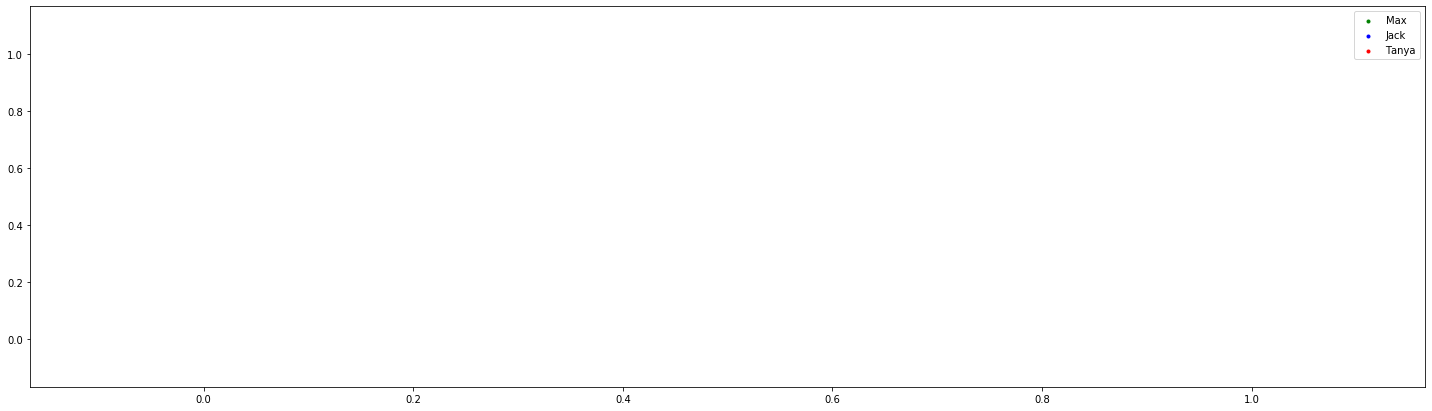

In [114]:
appearances = {'Max Branning':[], 'Jack Branning':[], 'Tanya Branning':[]}
for i, e in df_cut[df_cut.file == '5271844722846213628.mp4'].iterrows():
    if e['character'] in appearances:
        appearances[e['character']].append(e['start_frame'])

fig, ax = plt.subplots(figsize=(25,7))

ax.scatter(appearances['Max Branning'], [1]*len(appearances['Max Branning']), marker='.',
        color='green',  label='Max')
ax.scatter(appearances['Jack Branning'], [2]*len(appearances['Jack Branning']),marker='.',
        color='blue',  label='Jack')
ax.scatter(appearances['Tanya Branning'], [3]*len(appearances['Tanya Branning']), marker='.',
        color='red', label='Tanya')

ax.legend()
plt.show()

In [84]:
cut = 0.5
keep = 2
add = 2

In [85]:
df_cut = df[df.confidence > cut]

In [86]:
df_cut

,file,confidence,start_second,end_second,start_frame,end_frame,character
0,5313398531435045858.mp4,0.551089,801.0,813.0,20025,20325,Tanya Branning
1,5313398531435045858.mp4,0.778899,816.0,819.0,20400,20475,Tanya Branning
2,5313398531435045858.mp4,0.794452,821.0,822.0,20525,20550,Tanya Branning
3,5313398531435045858.mp4,0.520669,826.0,827.0,20650,20675,Tanya Branning
4,5313398531435045858.mp4,0.652187,2727.0,2729.0,68175,68225,Tanya Branning
...,...,...,...,...,...,...,...
34267,5323778608396028180.mp4,0.828511,5008.0,5010.0,125200,125250,Patrick Trueman
34271,5323778608396028180.mp4,0.525425,2667.0,2668.0,66675,66700,Mo Harris
34272,5323778608396028180.mp4,0.521853,3518.0,3519.0,87950,87975,Mo Harris
34273,5323778608396028180.mp4,0.712441,6616.0,6618.0,165400,165450,Max Branning


In [87]:
recs = {f:set() for f in df.file.unique()}
kept = {}
for i, e in df_cut.iterrows():
    file = e['file']
    k = find_prev(shots_starts[file], e['start_second'])
    recs[file].add(k-1)
    recs[file].add(k)
    recs[file].add(k+1)
    
    if (file, k, e['character']) not in kept:
        kept[(file, k, e['character'])] = []
    kept[(file, k, e['character'])].append(e['confidence'])
    
    if add == 2: 
        recs[file].add(k-2)
        recs[file].add(k+2)
        
    # if len(recs[file]) < 4:
    #    print(file, e['second'], k, recs[file])

In [88]:
# kept[('5313398531435045858.mp4', 245, 'Tanya Branning')]

In [89]:
data_kept = []
for k in kept:
    file, shot_id, character = k
    data_kept.append((file, shot_id, character, sum(kept[k])/len(kept[k])))

In [90]:
df_kept = pd.DataFrame(data_kept, columns=['file', 'shot_id', 'character', 'avg_confidence'])

In [91]:
df_kept

,file,shot_id,character,avg_confidence
0,5313398531435045858.mp4,245,Tanya Branning,0.551089
1,5313398531435045858.mp4,247,Tanya Branning,0.778899
2,5313398531435045858.mp4,249,Tanya Branning,0.794452
3,5313398531435045858.mp4,251,Tanya Branning,0.520669
4,5313398531435045858.mp4,820,Tanya Branning,0.652187
...,...,...,...,...
4069,5323778608396028180.mp4,1440,Patrick Trueman,0.828511
4070,5323778608396028180.mp4,792,Mo Harris,0.525425
4071,5323778608396028180.mp4,1046,Mo Harris,0.521853
4072,5323778608396028180.mp4,1914,Max Branning,0.712441


In [92]:
df_kept.to_csv('chosen_segments_'+str(cut)+'.csv')

In [93]:
segs = {}
for file in recs:
    seg_start = 0
    segs[file] = []
    sorted_ids = list(recs[file])
    if seg_start == 0:
        seg_start = sorted_ids[0]
        cur = sorted_ids[0]
    
    for i, e in enumerate(sorted_ids[1:]):
        if e == cur + 1:
            cur += 1
        elif i == len(recs) - 1 and e == cur + 1:
            segs[file].append((seg_start, e))
        else:
            if cur - seg_start > (0 if keep == 'all' else (keep * 2 + 1)):
                segs[file].append((seg_start, cur))
            seg_start = e
            cur = e

In [95]:
segs['5245830105934359183.mp4']

[(94, 108),
 (161, 170),
 (273, 282),
 (363, 369),
 (413, 422),
 (471, 477),
 (553, 559),
 (605, 611),
 (636, 645),
 (657, 663),
 (776, 785),
 (899, 906),
 (952, 958),
 (992, 1004),
 (1178, 1186),
 (1214, 1231),
 (1359, 1369),
 (1466, 1472),
 (1554, 1563),
 (1607, 1618),
 (1629, 1635),
 (1645, 1653),
 (2012, 2019)]

In [96]:
# if I keep everything
s = """5555360238519252381.mp4 100
5531550228324592939.mp4 128
5544620672795594434.mp4 31
5547193787702629969.mp4 96
5549784941472309008.mp4 100
5552368364300855101.mp4 108
5555325449284154780.mp4 89
5534228999422914578.mp4 129
5542003749222140011.mp4 87
5544574287152993687.mp4 100
5539381671692122744.mp4 117"""
# print(s)
print(sum([len(segs[ep]) for ep in segs]))

742


In [115]:
timed_segs = {}
for ep in segs:
    timed_segs[ep] = []
    print(ep)
    for s, e in segs[ep]:
        try:
            timed_segs[ep].append((shots_starts[ep][s], shots_ends[ep][e]))
        except Exception as ex:
            print('@', ep, s, e)
            print(str(ex))

5313398531435045858.mp4
5258818087037440299.mp4
5308226531817199474.mp4
5271844722846213628.mp4
5253646087419594905.mp4
5318609185758554501.mp4
5321170704253895214.mp4
5274434588125702436.mp4
5251033029316736209.mp4
5269245838135402929.mp4
5245830105934359183.mp4
5300433743159556513.mp4
5248439298566680341.mp4
5310822839547632763.mp4
5305617339184877785.mp4
5316007724067368375.mp4
5266645664934403562.mp4
5256228221757951173.mp4
5264050645694159353.mp4
5300410550331962313.mp4
5303026185415228226.mp4
5323778608396028180.mp4


In [116]:
timed_segs['5245830105934359183.mp4']

[(319.11, 370.13),
 (610.16, 632.08),
 (981.07, 1019.12),
 (1258.1, 1290.18),
 (1478.07, 1504.11),
 (1671.24, 1688.08),
 (1912.17, 1929.15),
 (2062.08, 2098.03),
 (2141.22, 2192.23),
 (2221.15, 2257.21),
 (2572.01, 2634.01),
 (2978.13, 2998.09),
 (3159.09, 3179.08),
 (3257.13, 3293.2),
 (3842.07, 3946.22),
 (4007.22, 4057.0),
 (4400.1, 4424.24),
 (4644.03, 4657.17),
 (5017.0, 5061.01),
 (5155.08, 5275.03),
 (5299.18, 5319.0),
 (5354.21, 5384.14),
 (6620.14, 6642.14)]

In [117]:
segs['5245830105934359183.mp4']

[(94, 108),
 (161, 170),
 (273, 282),
 (363, 369),
 (413, 422),
 (471, 477),
 (553, 559),
 (605, 611),
 (636, 645),
 (657, 663),
 (776, 785),
 (899, 906),
 (952, 958),
 (992, 1004),
 (1178, 1186),
 (1214, 1231),
 (1359, 1369),
 (1466, 1472),
 (1554, 1563),
 (1607, 1618),
 (1629, 1635),
 (1645, 1653),
 (2012, 2019)]

In [119]:
total_segments = 0
total_shots = 0
for ep in segs:
    total_segments += len(segs[ep])
    total_shots += sum([e - s for s, e in segs[ep]])
print('Shots:', total_shots)
print('Segments:', total_segments)

Shots: 8094
Segments: 742


In [120]:
pickle.dump(timed_segs, open(f'segs/segments_add{add}_keep{keep}_cut{cut}.pickle', 'wb'))